# Quantum Computing coursework



## Installing qiskit

There is information on installing qiskit at:  https://qiskit.org/documentation/getting_started.html
I really recommend using a virtual enviroment to install qiskit

* You can run on IBM's simulator using  https://quantum-computing.ibm.com/ and https://qiskit.org/ .


##  Installing qiskit on the University machines
These instructions are modified from the material developed by Vincent Drach. Unfortunately, you will have to do this everytime you start a new session.

* Start the anconda prompt
* conda create --name qiskit
* conda activate qiskit
* conda install numpy matplotlib spyder-kernels
* pip install qiskit
* pip install qiskit-aer
* pip install qiskit[visualization]

In Spyder Open Tools -> Preferences
select "Use the following python interpreter" and select the path of your installation

C:/Users/vdrach/.conda/envs/qiskit/python.exe

To check the enviroment, restart the kernel in the console



## Quantum Phase Estimation

The aim of this section is to numerically investigate the quantum phase estimation algorithm. This is an algorithm to estimate the eigenvalue of a unitary matrix. We will first use a simple matrix with known eigenvalues.

* Background to Quantum Phase Estimation https://en.wikipedia.org/wiki/Quantum_phase_estimation_algorithm

Based on https://github.com/qiskit-community/qiskit-textbook/blob/main/content/ch-algorithms/quantum-phase-estimation.ipynb

The Quantum Phase Estimate of the phase $\phi$

$$
U \mid \psi \rangle = e^{2 i \pi \beta } \mid \psi \rangle
$$

A good source of documentation on the different quantum gates in qiskit is https://qiskit.org/documentation/tutorials/circuits/3_summary_of_quantum_operations.html


In [2]:
#initialization
import matplotlib.pyplot as plt
import numpy as np
import math
from math import pi

# importing Qiskit
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

# import basic plot tools
from qiskit.visualization import plot_histogram

### Function to do inverse quantum fourier transform

In [3]:
def qft_dagger(qc, n):
    """n-qubit QFTdagger the first n qubits in circ"""
    # Don't forget the Swaps!
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-math.pi/float(2**(j-m)), m, j)
        qc.h(j)


#### Code to do the quantum phase estimation

The quantum_phase_est estimates the phase $\beta$ of the eigenvalue for the unitary matrix below.


\begin{split}U(\theta, \phi, \lambda) =
    \begin{pmatrix}
        \cos\left(\frac{\theta}{2}\right)          & -e^{i\lambda}\sin\left(\frac{\theta}{2}\right) \\
        e^{i\phi}\sin\left(\frac{\theta}{2}\right) & e^{i(\phi+\lambda)}\cos\left(\frac{\theta}{2}\right)
    \end{pmatrix}\end{split}

* angle is $\theta$ = $\lambda$ = $\phi$ in the above
* nbit is the number of measurement qubits

In [4]:
def quantum_phase_est(nqbit, angle ):
   # Create and set up circuit
  nbit_out = nqbit + 1 
  qpe2 = QuantumCircuit(nbit_out, nqbit)

  # Apply H-Gates to counting qubits:
  for qubit in range(nqbit):
    qpe2.h(qubit)

  repetitions = 1
  for counting_qubit in range(nqbit):
    for i in range(repetitions):
        qpe2.cu(angle, angle, angle, 0,counting_qubit, nqbit);
    repetitions *= 2

  # Do the inverse QFT:
  qft_dagger(qpe2, nqbit)

  # Measure of course!
  for n in range(nqbit):
    qpe2.measure(n,n)
                
  return qpe2

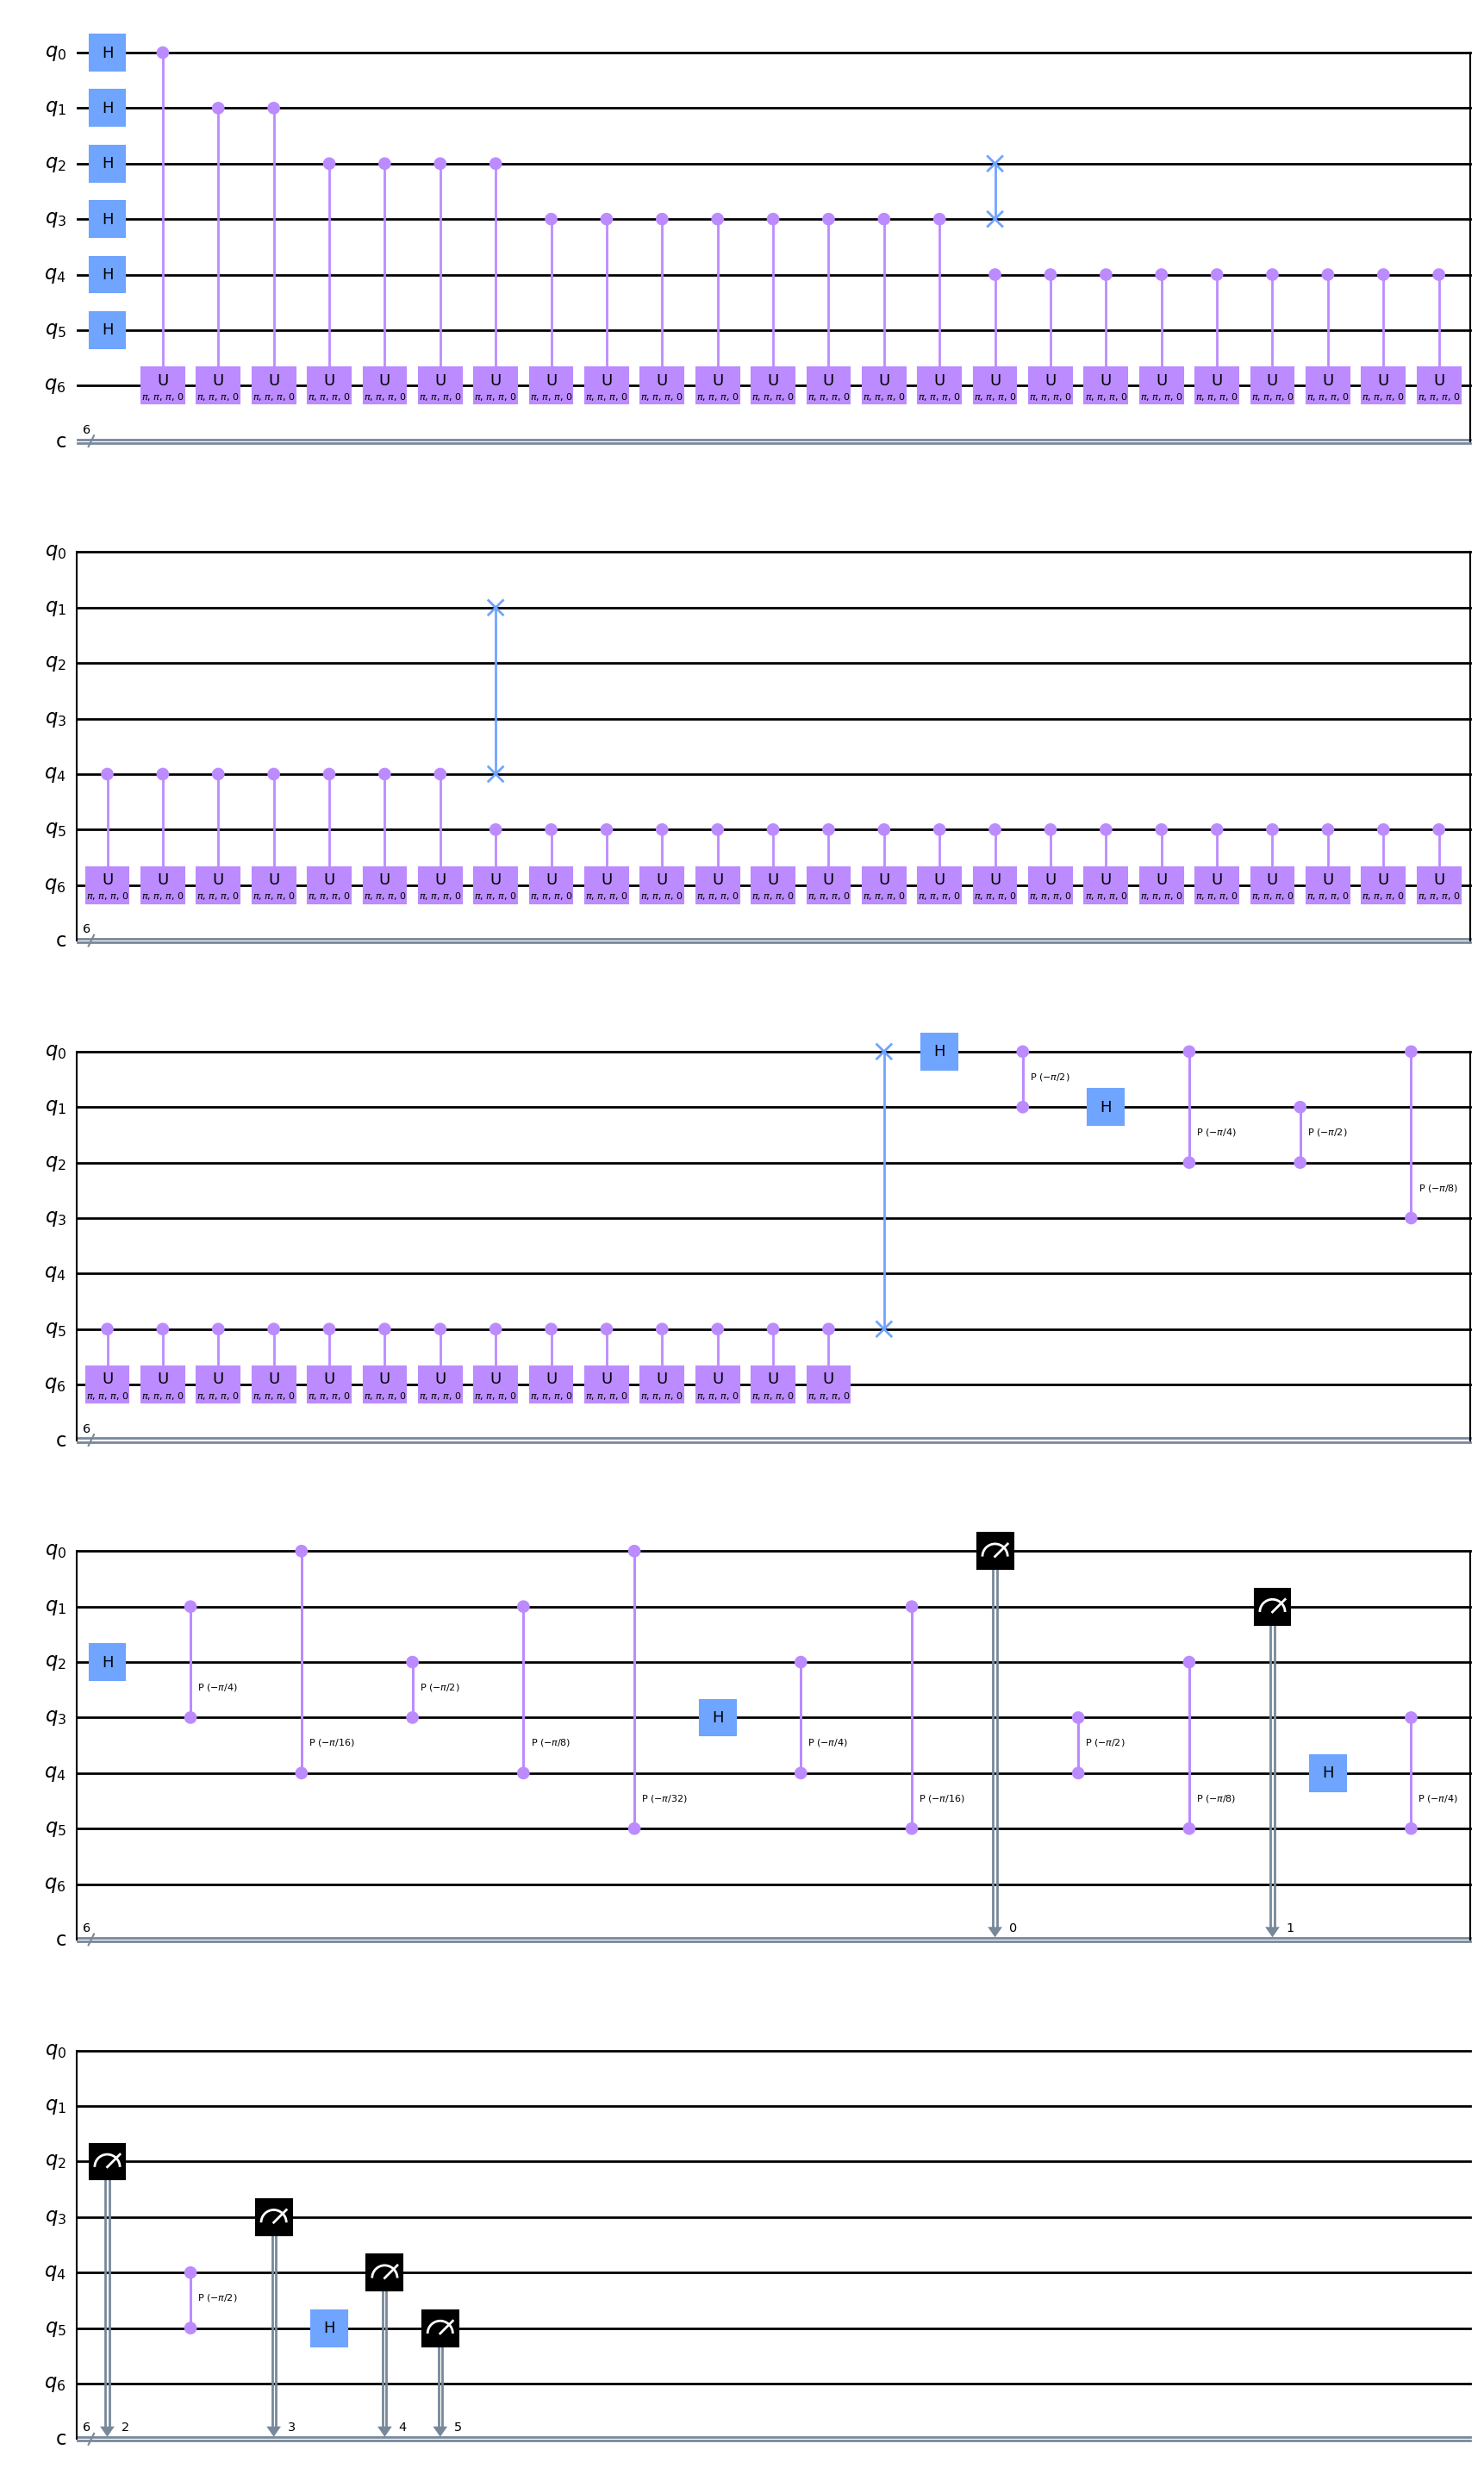

In [5]:

qpe2  =  quantum_phase_est(6,2*math.pi/2 )
qpe2.draw("mpl")

In [6]:
aer_sim = Aer.get_backend('aer_simulator')
shots = 2048
t_qpe2 = transpile(qpe2, aer_sim)
results = aer_sim.run(t_qpe2, shots=shots).result()
answer = results.get_counts()



The result for the phase is in the form of binary decimal notation for 3 measurement bits
$ x = 0. \phi_1 \phi_2 \phi_3 $   

where $\phi_j$ is 1 or  0

$x = \phi_1 / 2 + \phi_2 / 4 + \phi_3 / 8 $ 


In [7]:
answer


{'010000': 958, '110000': 1090}

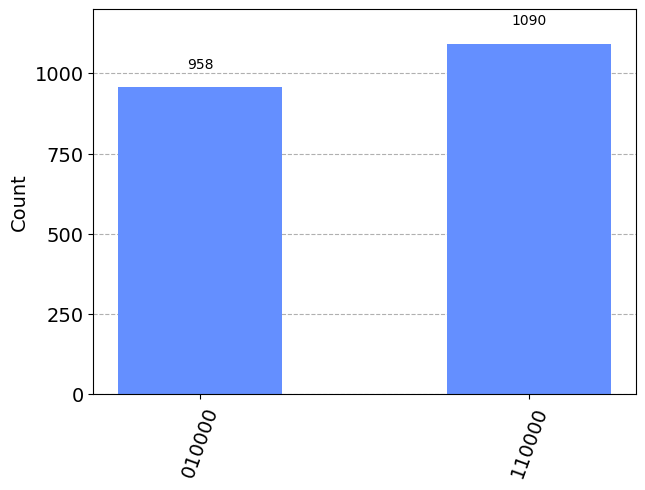

In [8]:
plot_histogram(answer)

In [9]:
## Find the 

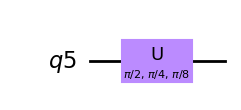

In [10]:
q = QuantumRegister(1)
qU = QuantumCircuit(q)
qU.u(pi/2,pi/4,pi/8,q)
qU.draw("mpl")

In [11]:
from qiskit import BasicAer
backend = BasicAer.get_backend('unitary_simulator')
job = backend.run(transpile(qU, backend))
matrix = job.result().get_unitary(qU, decimals=3)
matrix

array([[ 0.707+0.j   , -0.653-0.271j],
       [ 0.5  +0.5j  ,  0.271+0.653j]])

In [12]:
from numpy import linalg as LA
import cmath

In [13]:
eigenvalues, eigenvectors = LA.eig(matrix)
print(eigenvalues)

[0.93842902-0.34585756j 0.03957098+0.99885756j]
